<a href="https://colab.research.google.com/github/olatunde222/Digit-Classification/blob/main/MNIST_Digit_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST hand written digit classification using Deep Learning (Neural Network)

Importing the neccessary libraries and or dependencies.




In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow ## google collab does not allow
                                      #imshow in cv2, you will have to use this
from PIL import Image
from tensorflow import keras
from tensorflow.math import confusion_matrix
from keras.datasets import mnist

tf.random.set_seed(3)


***Loading the MNIST data from keras available dataset***

In [66]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() # this data is available
                                          # on the keras website for public use.


In [67]:
type(x_train)
type(y_train)

numpy.ndarray

In [68]:
# checking the shape  of the dataset

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [69]:
print(x_train[5].shape) # checking the size of the 5th images from the dataset.
print(x_train[5]) # Displaying the 5th images from the tarining data


(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 2

###### Training data = 60000
###### Testing data = 10000 images
###### Image dimension = 28 X 28
###### Grayscale Image with only on channel.
###### All images have the same size and dimensions


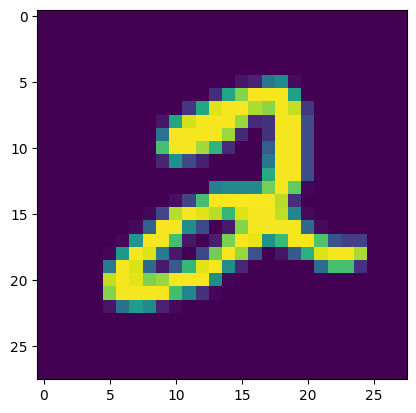

2


In [70]:
## Displaying the 5th image

plt.imshow(x_train[5])
plt.show()

## Printing the corresponding test data

print(y_train[5])

In [71]:
# checking the size and unique values in the labels

print(y_train.shape, y_test.shape)

# unique

print(np.unique(y_train))
print(np.unique(y_test))

(60000,) (10000,)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Data Normalization**

In [72]:
## Scalling the data by 255 to have scaled values between 0 and 1 for ease of
#  the Neaural Network.

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Building the Neural Network**

In [73]:
# Setting up the Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(10,  activation="sigmoid")
])

In [74]:
# Complie the Neural Network

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy" , metrics=["accuracy"] )

In [75]:
# Training the scaled data with the built and compiled model

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3164 - accuracy: 0.9107
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1505 - accuracy: 0.9553
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1145 - accuracy: 0.9657
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0936 - accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0794 - accuracy: 0.9753


**Model Evalation**

In [76]:
loss, accuracy = model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9699


In [77]:
print(x_test.shape)

(10000, 28, 28)


the corresponding label in the test data is: 7


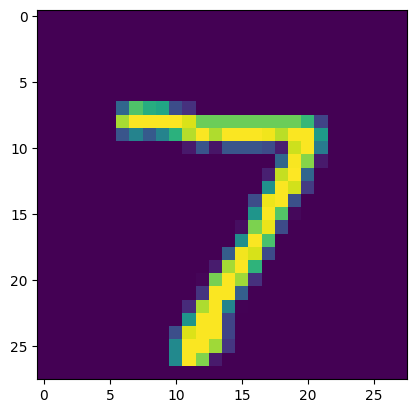

In [78]:
# Display 1st data in x test


print("the corresponding label in the test data is:",y_test[0])
plt.imshow(x_test[0])
plt.show()

In [79]:
prediction = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


In [85]:
print(prediction.shape)
print(prediction[0])

(10000, 10)
[4.2166063e-01 1.5605694e-01 9.0360701e-01 8.7540478e-01 1.5164785e-05
 2.0646988e-01 4.1730555e-06 9.9993837e-01 5.0605286e-02 6.9699109e-01]


In [86]:
arg_max = np.argmax(prediction[0]) # getting the maximum probabilty of the prediction

In [87]:
print(arg_max)

7


In [89]:
## Lopping through the predicted label probalities for all the test data

pred_labels = [np.argmax(i) for i in prediction]


In [91]:
print(pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 3, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 2, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Confusion Metrics**

In [93]:
## Seeing how well the model is predicting the labels of the test data.

con_matrix = confusion_matrix (y_test, pred_labels)

print(con_matrix)

tf.Tensor(
[[ 967    0    0    0    1    2    2    3    4    1]
 [   0 1116    4    3    0    1    4    1    6    0]
 [   7    0  999    2    2    0    5    5   12    0]
 [   2    0   10  976    1    3    1    6    8    3]
 [   3    0    6    0  958    0    1    1    3   10]
 [   5    0    0   20    2  842    9    0   12    2]
 [   9    3    1    2    7    2  928    1    5    0]
 [   1    4   15    0    2    0    0 1000    2    4]
 [   7    1    3    6    2    3    2    4  942    4]
 [   3    3    0    7    8    3    0   10    4  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

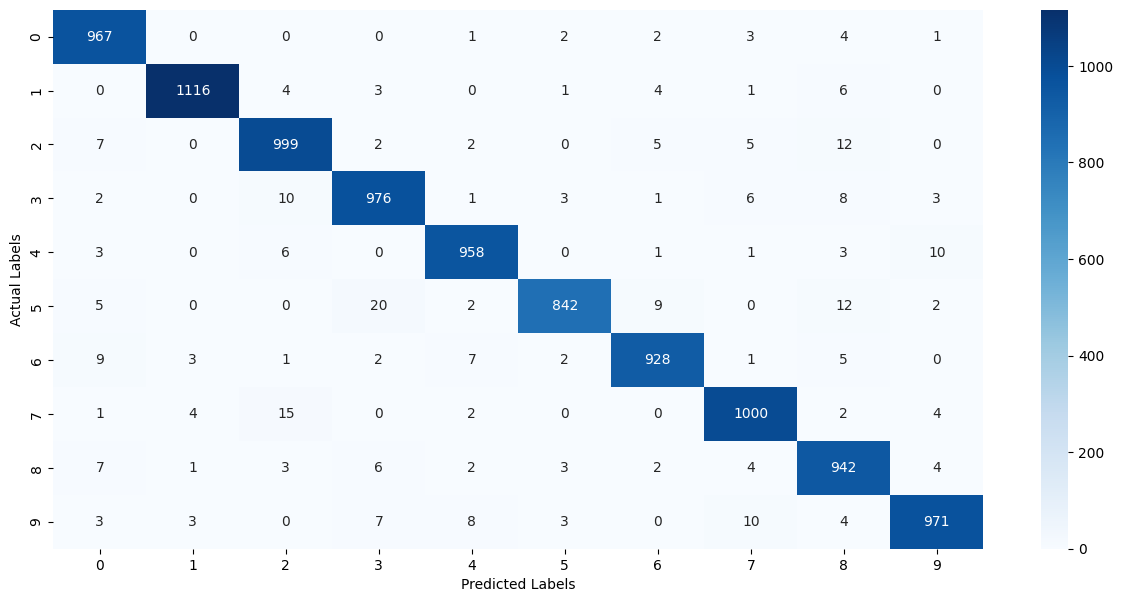

In [94]:

## Plotting the confusion matrix

plt.figure(1,figsize=(15, 7))
sns.heatmap(con_matrix,annot=True, fmt='d', cmap="Blues")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

**Building a Predictive system**

In [95]:
new_img_path = "/content/MNIST_digit.png"

new_img = cv2.imread(new_img_path)

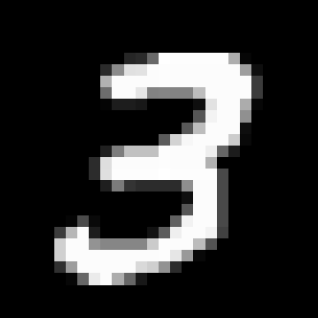

In [99]:
## displayimg the new image

cv2_imshow(new_img)

In [100]:
print(type(new_img))
print(new_img.shape)

<class 'numpy.ndarray'>
(318, 318, 3)


In [101]:
# from the above, it is obvious that the testing image has a different dimension
# with that which the model is trained on. therefor it neeed to be reshaped and
# resized and converted to a gray scale image


## converting to GrayScale

gray_scale = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)

# checking if successfully converted

print(gray_scale.shape)



(318, 318)


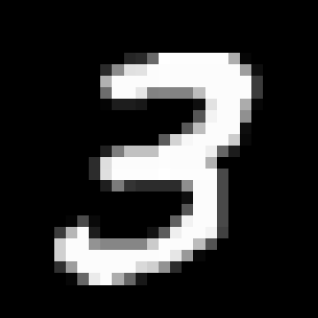

In [103]:
cv2_imshow(gray_scale)

In [108]:
## Resizing the image

gray_scale_resz = cv2.resize(gray_scale, (28,28))
cv2_imshow(gray_scale_resz )
print(gray_scale_resz.shape)

(28, 28)


In [110]:
## Normalizing the image by 255

image_norm = gray_scale_resz / 255

## Reshaping the image data to fit into 1 instance

image = np.reshape(image_norm,[1,28,28])

In [111]:
## Loading the new image into the model for prediction


new_pred = model.predict(image)

print(new_pred)



1/1 [==============================] - 0s 41ms/step
[[2.8912869e-01 9.4526084e-03 2.9600473e-02 9.9999976e-01 7.3245282e-10
  1.3167852e-01 3.5454639e-11 1.5112996e-04 4.9968296e-01 8.4926581e-01]]


In [113]:
pred = np.argmax(new_pred)

##
print(pred)

3


**Predictive System**

kindly put the path of the image to be predicted:/content/MNIST_digit.png


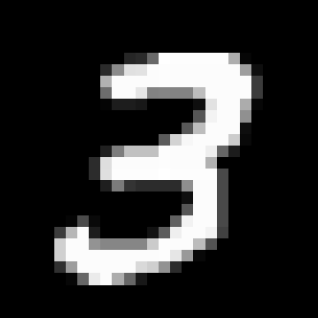

(28, 28)
(318, 318)
(28, 28)
1/1 [==============================] - 0s 23ms/step
[[2.8912869e-01 9.4526084e-03 2.9600473e-02 9.9999976e-01 7.3245282e-10
  1.3167852e-01 3.5454639e-11 1.5112996e-04 4.9968296e-01 8.4926581e-01]]
The Handwritten Digit is recognised as 3


In [115]:
new_img_path = input("kindly put the path of the image to be predicted:")

new_img = cv2.imread(new_img_path)
## displayimg the new image
cv2_imshow(new_img)

gray_scale_resz = cv2.resize(gray_scale, (28,28))

cv2_imshow(gray_scale_resz )
print(gray_scale_resz.shape)

## converting to GrayScale
gray_scale = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)

# checking if successfully converted
print(gray_scale.shape)


## Resizing the image
gray_scale_resz = cv2.resize(gray_scale, (28,28))
print(gray_scale_resz.shape)

## Normalizing the image by 255
image_norm = gray_scale_resz / 255

## Reshaping the image data to fit into 1 instance
image = np.reshape(image_norm,[1,28,28])

## Loading the new image into the model for prediction
new_pred = model.predict(image)
print(new_pred)

pred = np.argmax(new_pred)

##
print("The Handwritten Digit is recognised as",pred)